# This section belongs to the previous Labs

1. Import libraries needed

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns

2. Load csv file as 'customer_df'

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(3)




,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize


3. Renaming and first exploration on data

In [3]:
customer_df.shape


(9134, 24)

In [4]:
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Format name of columns to be PE8 (lower case + replace space for underscore)

In [5]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

5. identify nulls and other formating errors

In [7]:
customer_df.isnull().sum() #no null values identified!

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].astype('datetime64[ns]')
customer_df['effective_to_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


In [9]:
customer_df['state'].unique()
customer_df['gender'].unique() #data does not seem to have different values in the columns
customer_df['education'].unique()
customer_df['marital_status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [10]:
num = customer_df.select_dtypes(include=np.number)
num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


we can see that after chaging the format for effective_to_date , it does not appear in cat or num


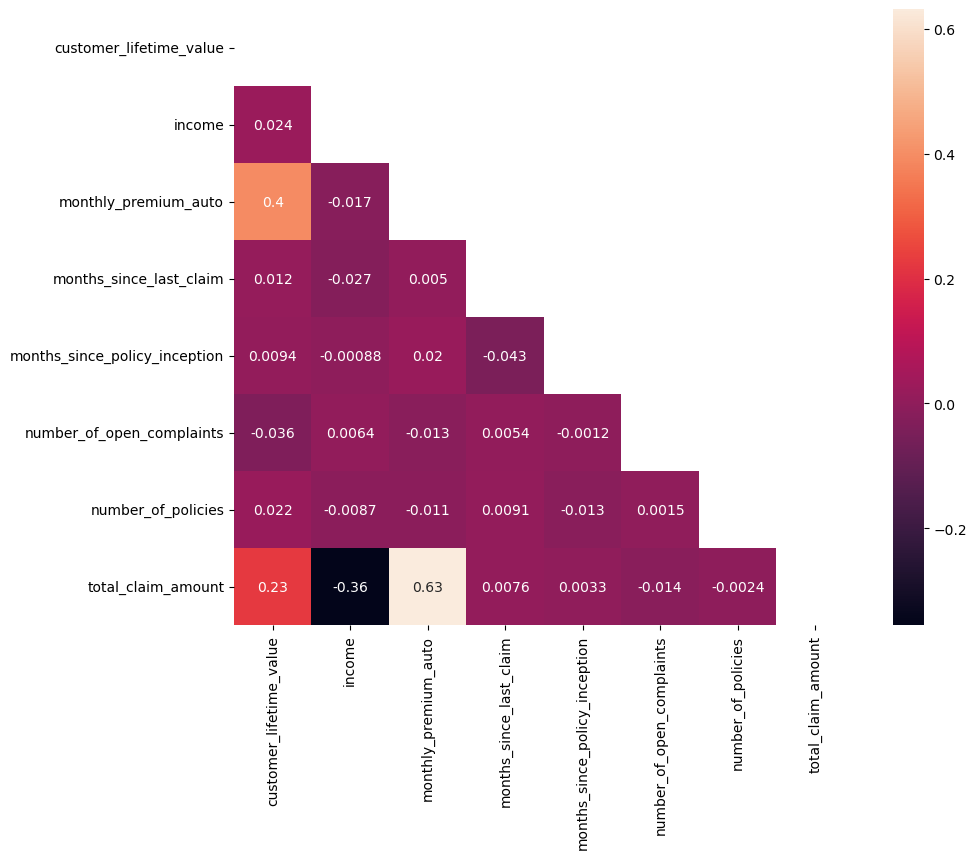

In [11]:
correlation = num.corr()

hm = np.zeros_like(correlation)
hm[np.triu_indices_from(hm)] = True #show half of the matrix

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlation, mask=hm, annot=True)
plt.show()

There is no very high correlation between the values. 

The highest is monthly_premium_auto with total_claim_amount for 0,63 . 

7. Plot the numerical continuous variables

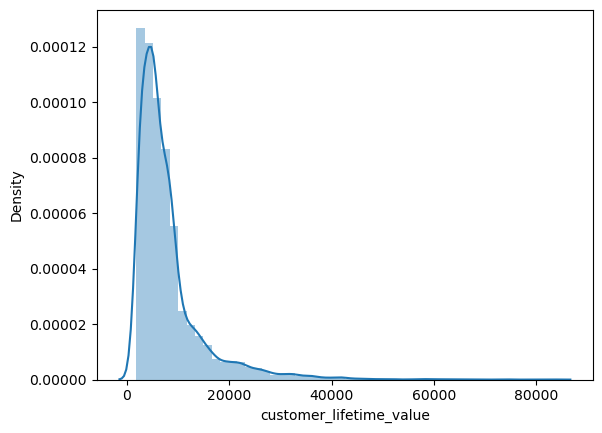

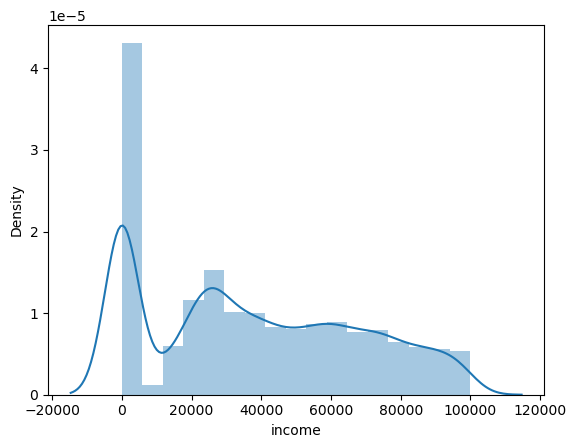

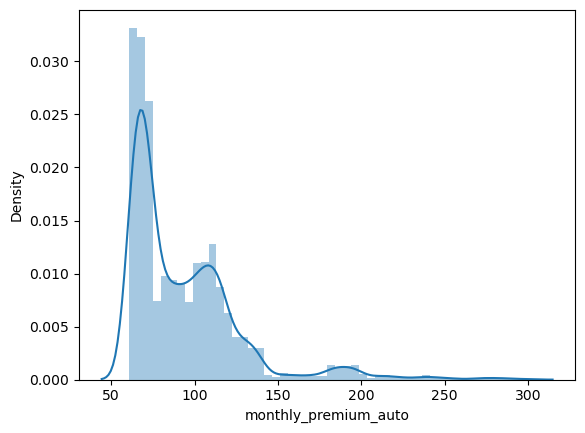

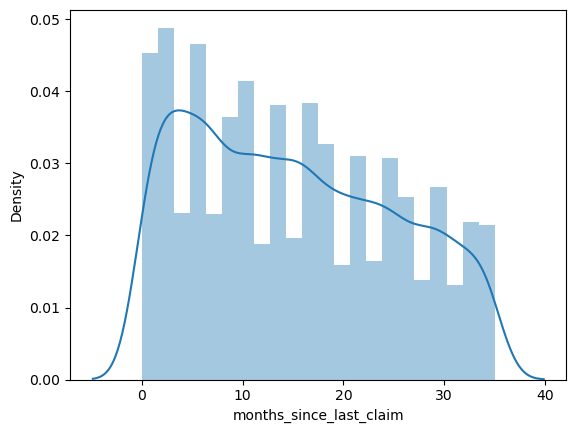

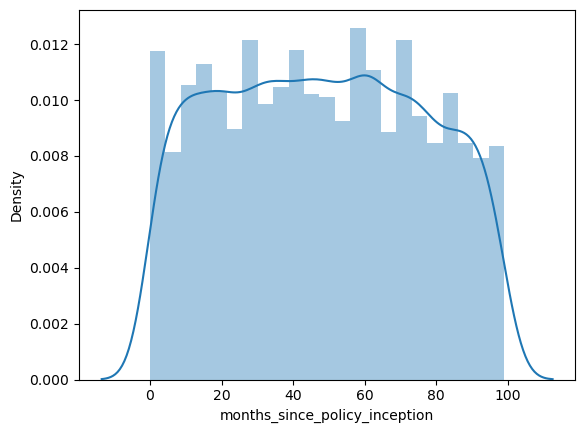

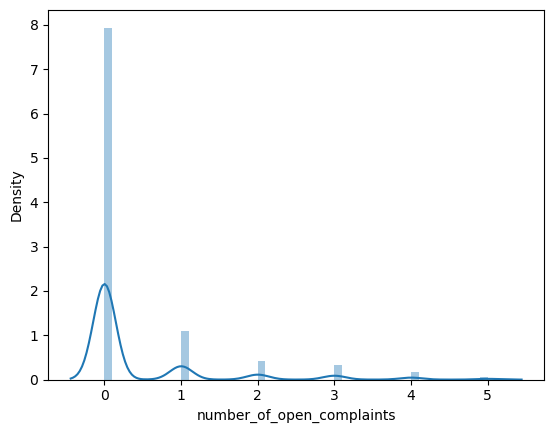

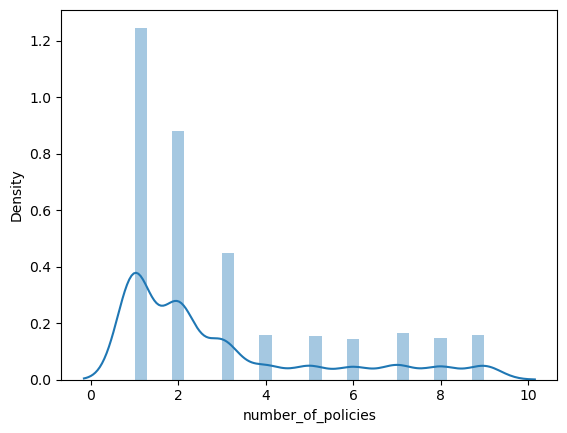

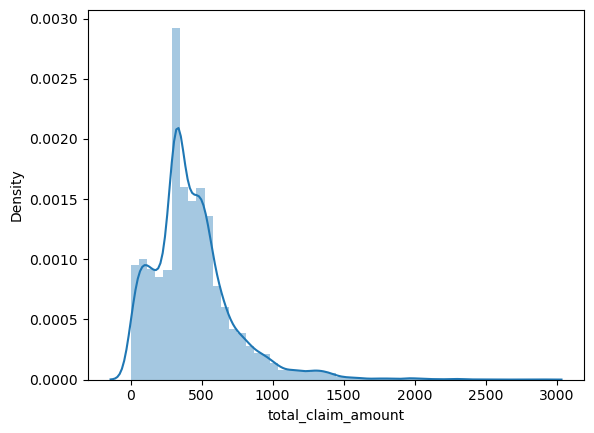

In [12]:
for column in num:
    sns.distplot(num[column])
    plt.show()

- most distributions are left skewd 
- some trans formations can be used in order to have a more normal distribution

8. Plot categoricals, remove target (customer_id) (to plot categoricals use bar plots)

In [13]:
cat = customer_df.select_dtypes(np.object_)
cat_target = customer_df['customer']
cat = cat.drop('customer', axis=1)
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


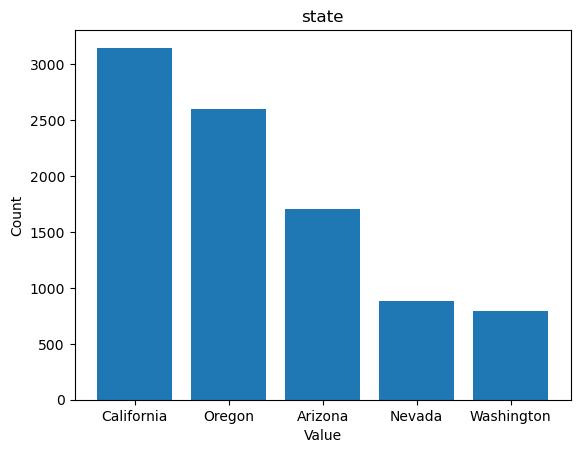

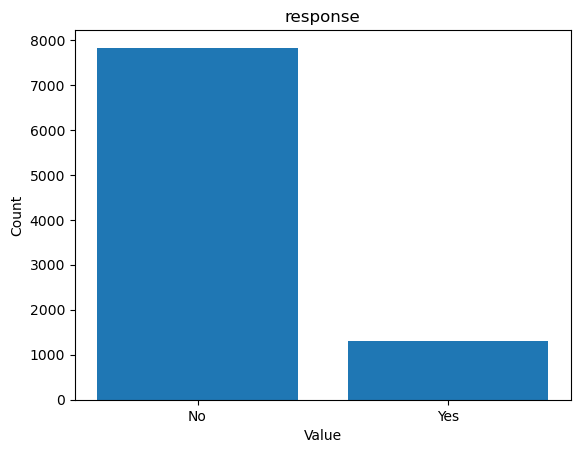

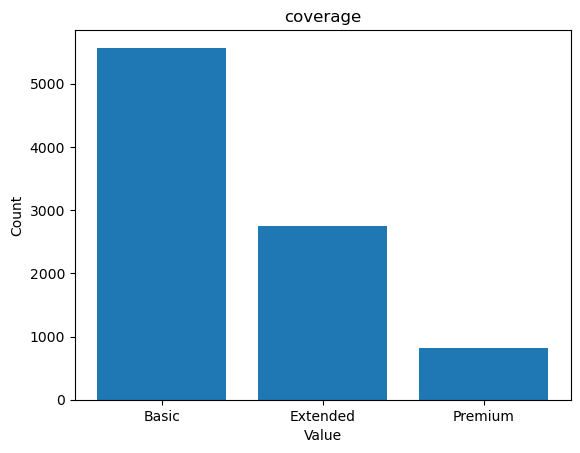

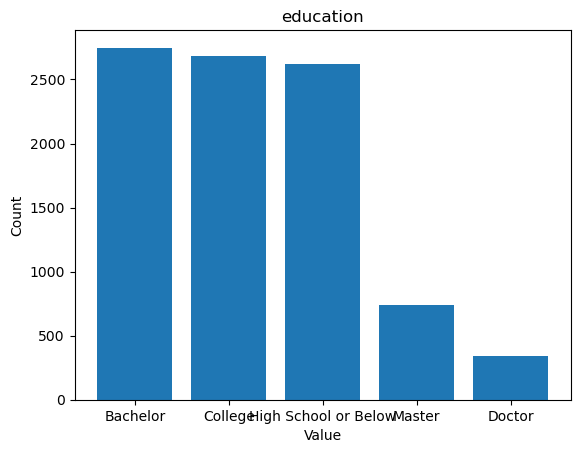

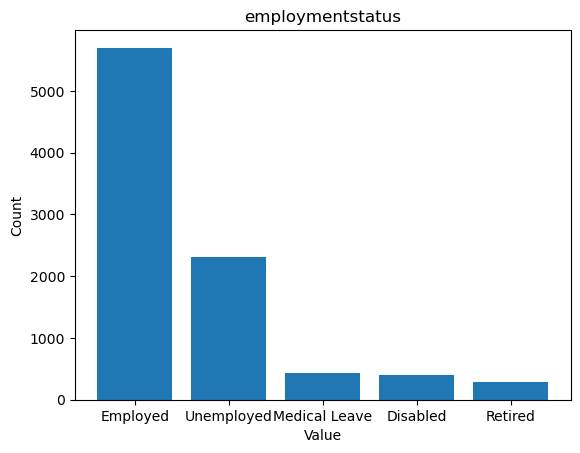

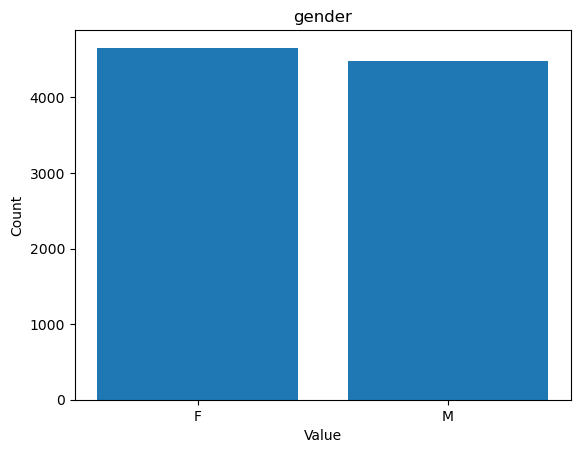

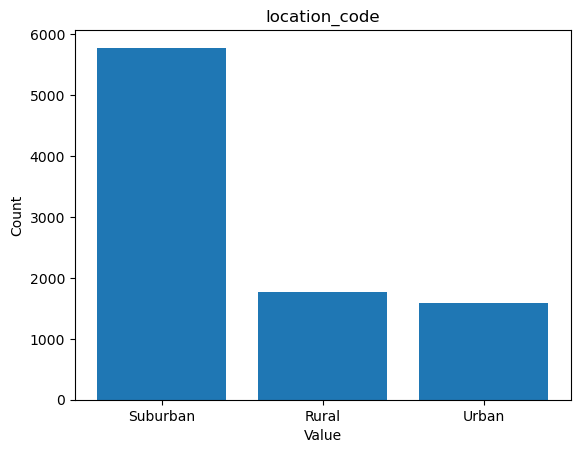

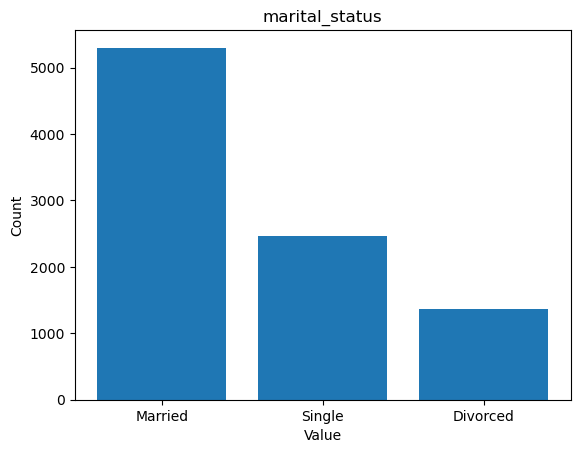

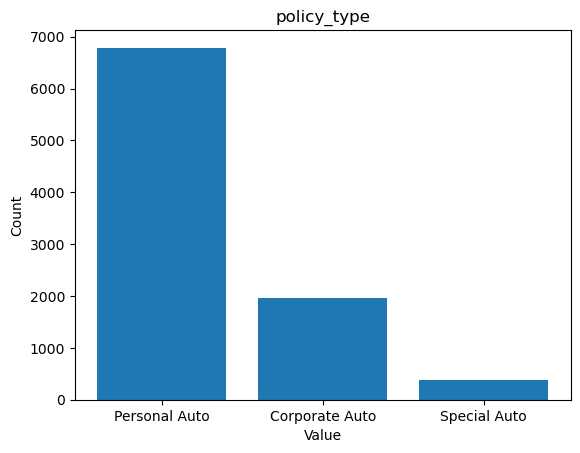

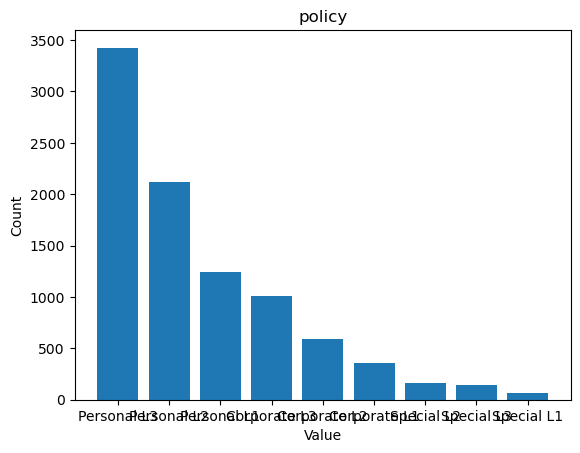

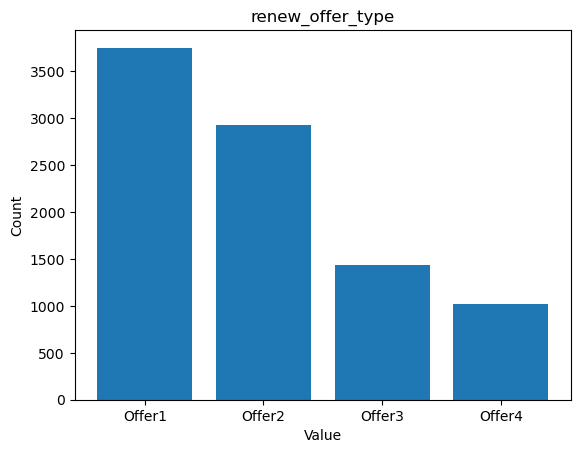

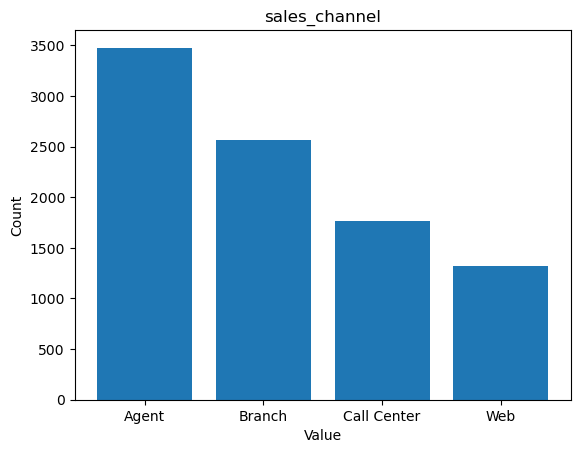

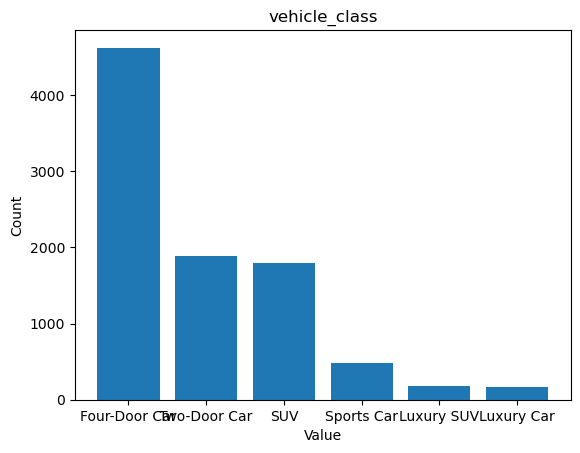

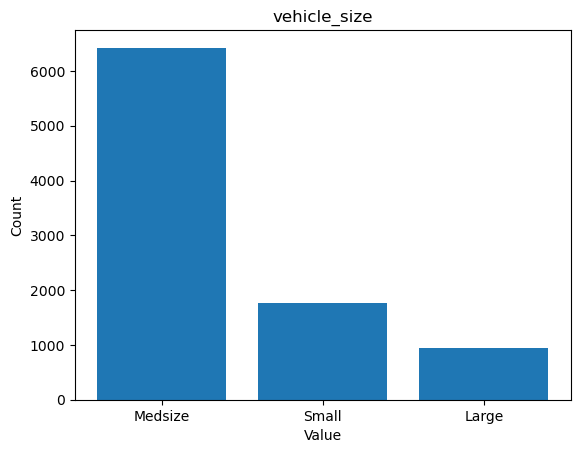

In [14]:
for column in cat:
    values = cat[column].value_counts() #use count function to give values to information data
    plt.figure()
    plt.bar(values.index, values.values)
    plt.title(column) #sets the title of each graph as the name of the column in df
    plt.xlabel('Value') #sets the default title for x axis
    plt.ylabel('Count') #sets the default title for y axis
    plt.show()

- we can see a lot of imbalance data, especially in response, state, Vehicle Class, Vehicle Size, policy, location, marital, and employement status

9. Look for outliers in the continuous variables

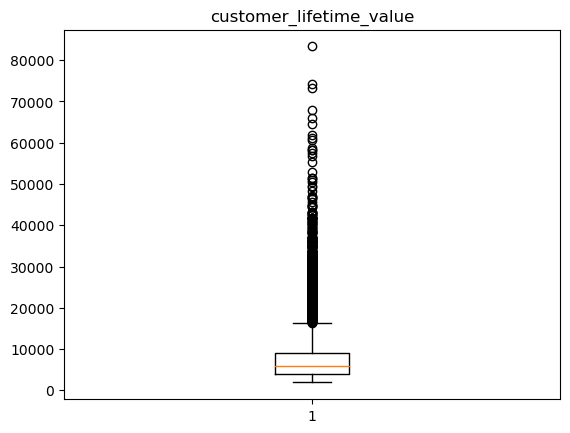

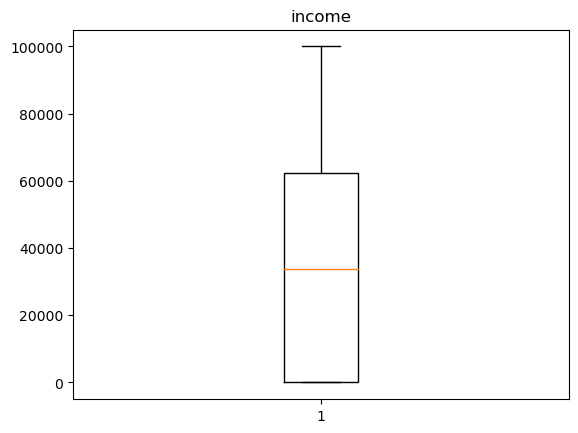

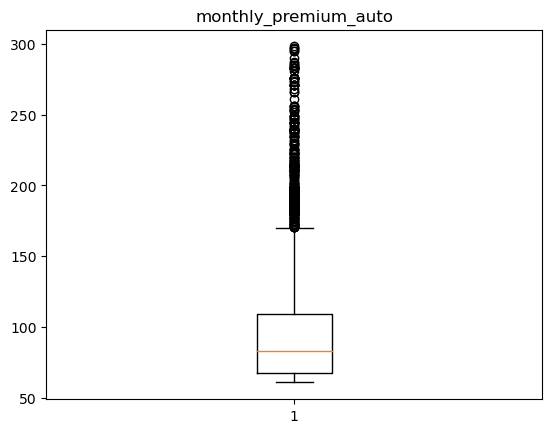

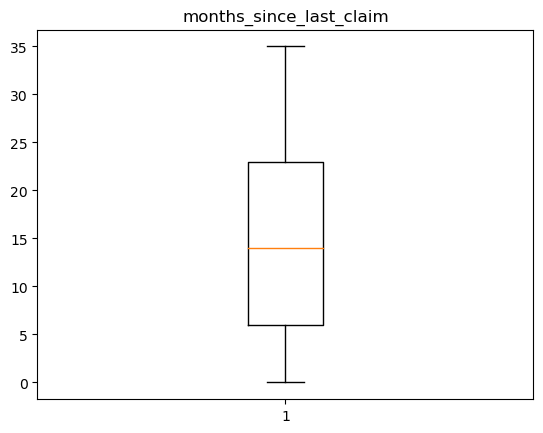

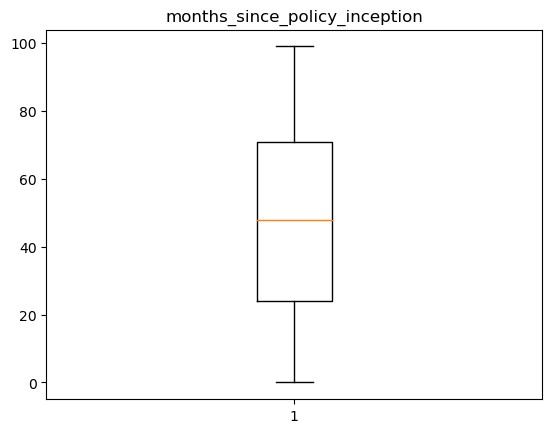

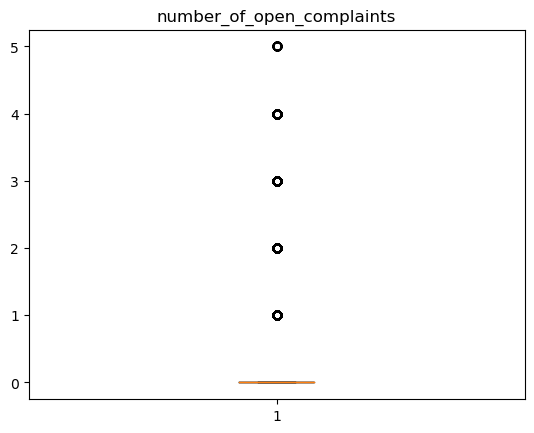

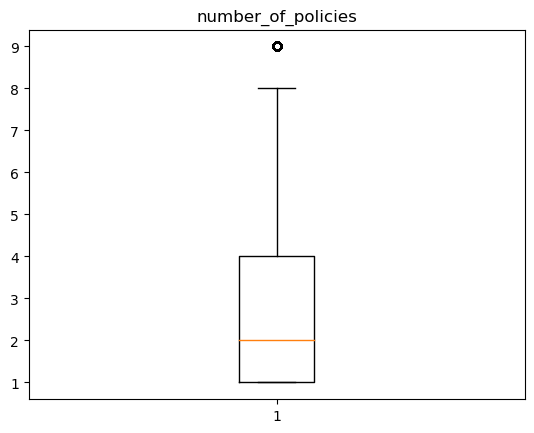

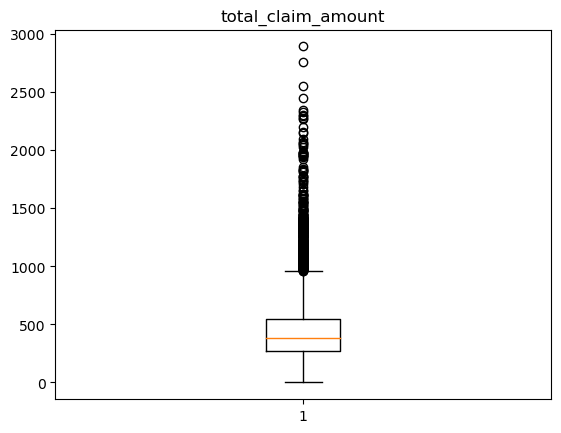

In [15]:
for column in num:
    plt.boxplot(num[column])
    plt.title(column)
    plt.show()

- we identify some outliers in the different columns
- we should identify an interquartile range that is acceptable for us, and eliminate the outliers that are outside of that range. 

10. Are there any NaN values?

In [16]:
cat.isnull().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [17]:
num.isnull().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

- No null values in the data set! :) 

# The Lab begins Here

1. Use the categorical dataframe

In [18]:
cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


2. Plot categoricals

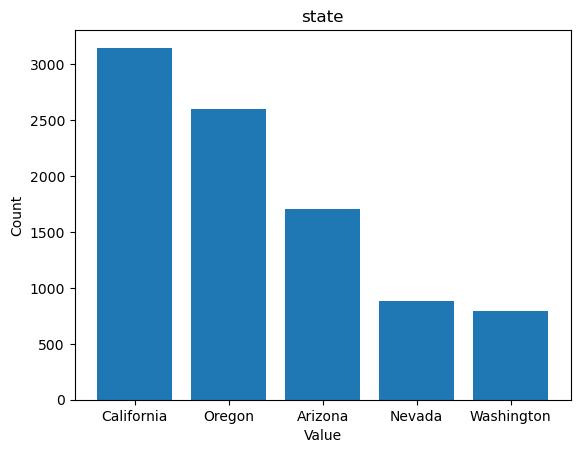

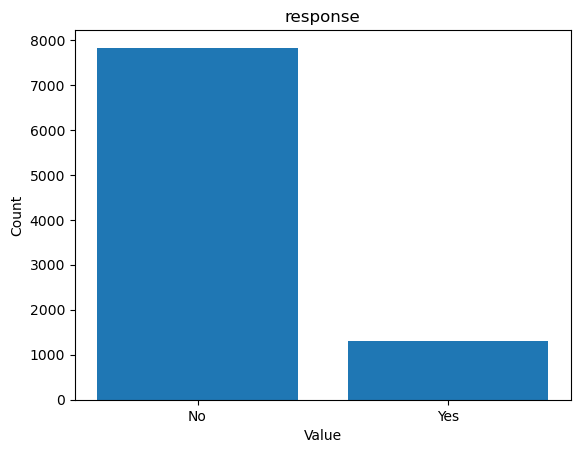

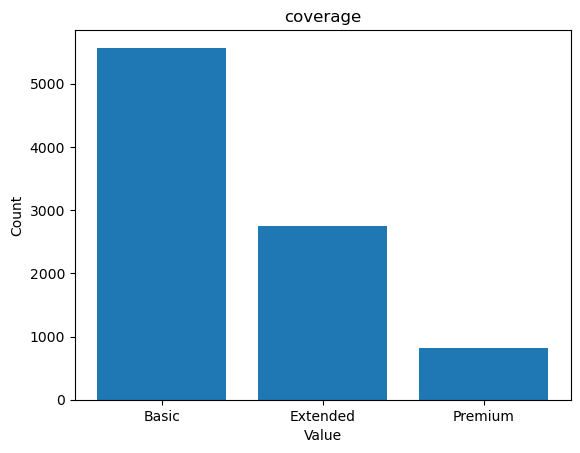

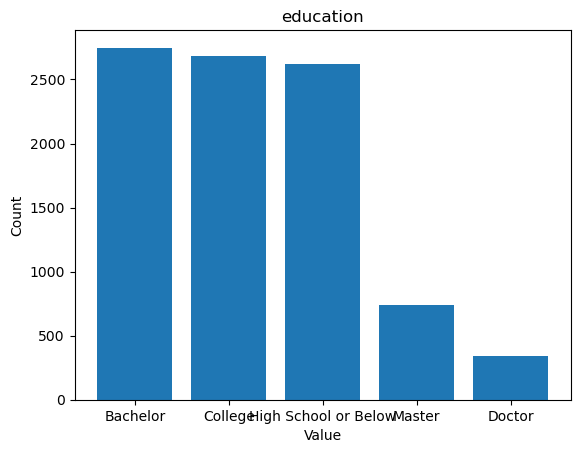

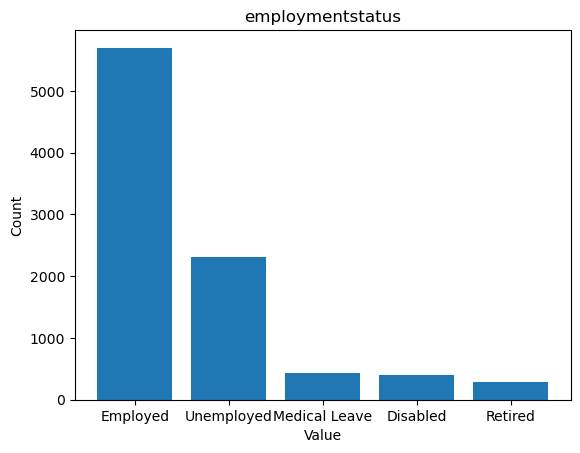

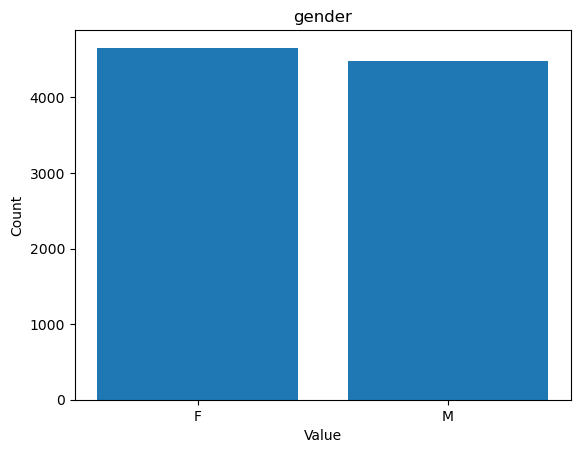

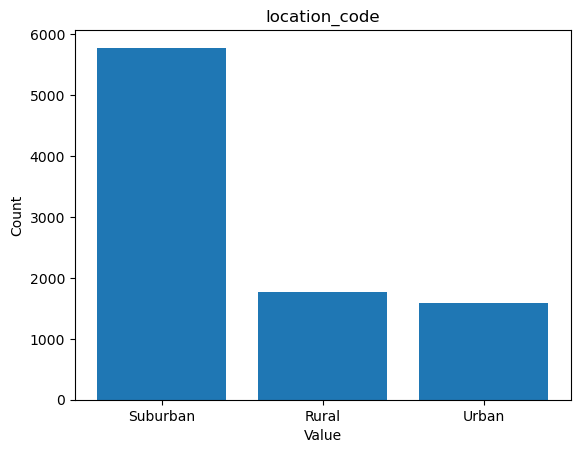

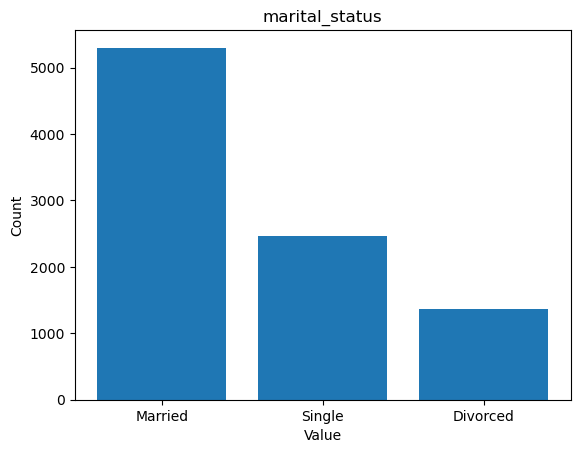

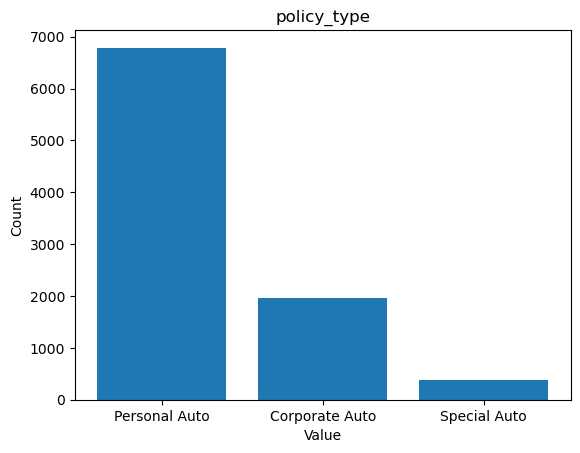

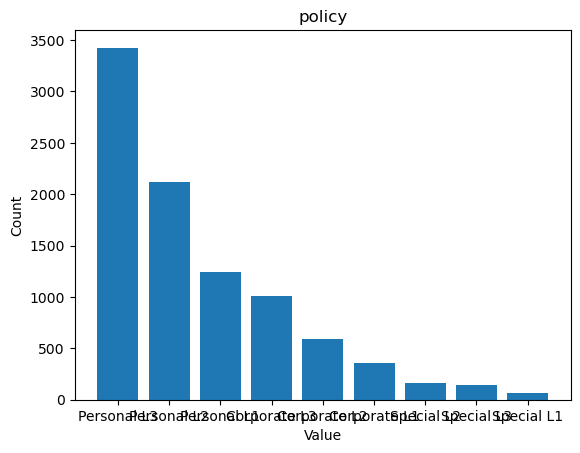

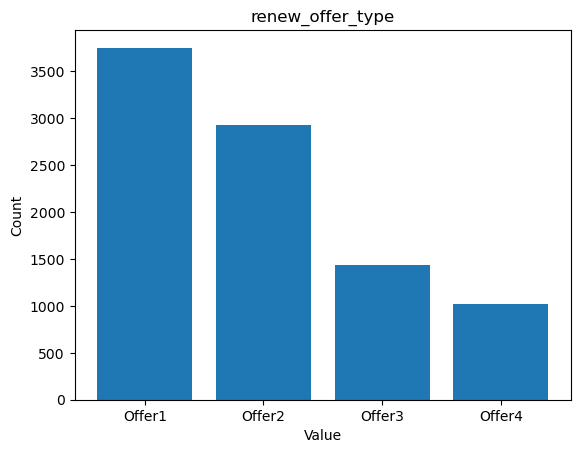

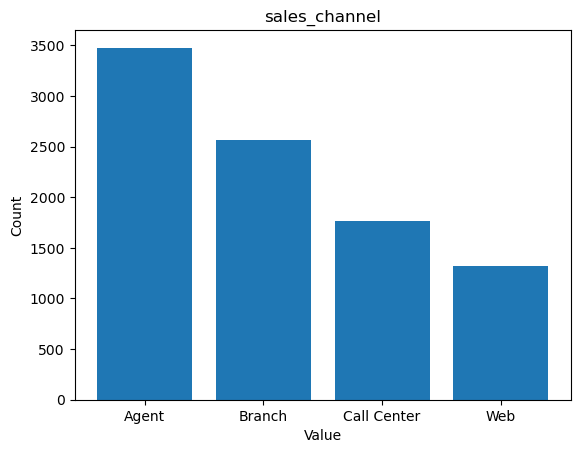

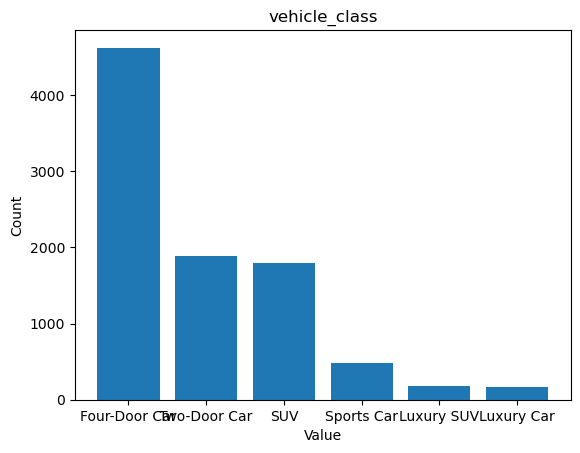

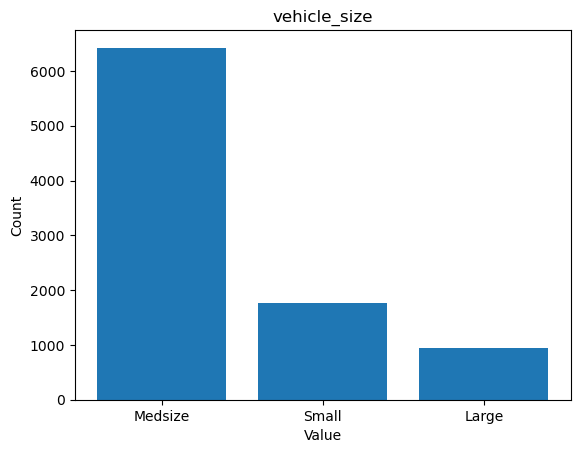

In [19]:
for column in cat:
    values = cat[column].value_counts() 
    plt.figure()
    plt.bar(values.index, values.values)
    plt.title(column) 
    plt.xlabel('Value') 
    plt.ylabel('Count') 
    plt.show()

we identify some imbalanced data. Additionally, we identify some variables can be grouped together like 'policy'

3. Feature editing : should we keep all the columns? 

In [20]:
#policy is the only real column that its values should be grouped. The other variables have somewhat meaningful unique values. 

new_policy = {'Personal L3': 'Personal',
    'Personal L2': 'Personal',
    'Personal L1': 'Personal',
    'Corporate L3': 'Corporate',
    'Corporate L2': 'Corporate',
    'Corporate L1': 'Corporate',
    'Special L2': 'Special',
    'Special L3': 'Special',
    'Special L1': 'Special'}

cat['policy'] = cat['policy'].apply(lambda x: new_policy[x])
cat['policy'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64

4. Plot 'time' variable

In [21]:
customer_df['effective_to_date'].head() #variable has remained in the original dataframe

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-02-03
Name: effective_to_date, dtype: datetime64[ns]

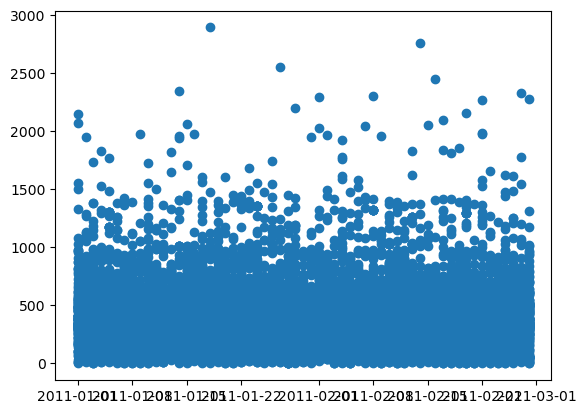

In [22]:
plt.plot_date(customer_df['effective_to_date'], customer_df['total_claim_amount']) #plot_date to plot date format variables
plt.show()

We should try and group the dates by month to see them better

In [23]:
print('the min value is :', customer_df['effective_to_date'].min() ,'and the max value is :', customer_df['effective_to_date'].max() )



the min value is : 2011-01-01 00:00:00 and the max value is : 2011-02-28 00:00:00


The effective to date values range from 01.01.2011 and 28.02.2011. 

We can group the dates into January and February and see how many customers subscribed each month

In [24]:
customer_df["effective_to_date"] = customer_df["effective_to_date"].dt.strftime('%Y-%m-%d')


In [25]:
customer_df['effective_date'] = customer_df['effective_to_date'].apply(lambda x: 'Jan_2011' if x >= '2011-01-01' and x <= '2011-01-31' else 'Feb_2011' if x >= '2011-02-01' and x <= '2011-02-28' else 'Other')

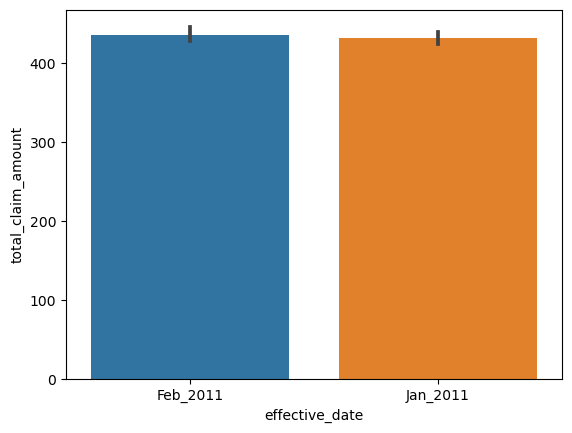

In [32]:
sns.barplot(x=customer_df["effective_date"], y=customer_df["total_claim_amount"])
plt.show()